In [23]:
from collections import Counter

from matplotlib.cm import get_cmap

from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model, save_to_json
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 500)

# Load Data

In [16]:
ica_data = load_json_model('../data/p_syringae.json')

In [3]:
print('All iModulons:')
print(ica_data.imodulon_names)

All iModulons:
['Nitrogen', 1, 'Motility', 'Sulfur-1', 'Recombination', 5, 'IS-elements', 'Molybdenum', 'Alginate', 'Resistance', 'Sulfur-2', 11, 'Plasmid A', 'Carb Transport', 'Chaperone', 'Coronatine', 16, 17, 'Nt/Ribosome', 'single_gene_1', 'single_gene_2', 'Fe/Protein Transport', 'Inositol', 'Phage', 'Protocatechuate', 'Flagella-1', 'Fur', 'Bactin', 28, 'Fatty Acid', 'Phosphate', 'Secretion', 'Folate', 'Pyoverdine', 34, 'Flagella-2', 'Translation', 'T3SS', 'Glycan', 'Copper', 40, 'single_gene_3', 'single_gene_4', 'single_gene_5', 'Fe-S']


# Categories

In [27]:
col_cat_dict = dict(zip(ica_data.imodulon_table['category'].unique(), get_cmap('tab10').colors))

In [9]:
counts = Counter(ica_data.imodulon_table['category'])
tups = [(k, v) for k, v in counts.items()]
cats, counts = zip(*sorted(tups, key=lambda tup: tup[1], reverse=True))

Text(0.5, 1.0, 'P. syringae iModulon Categories (n=45)')

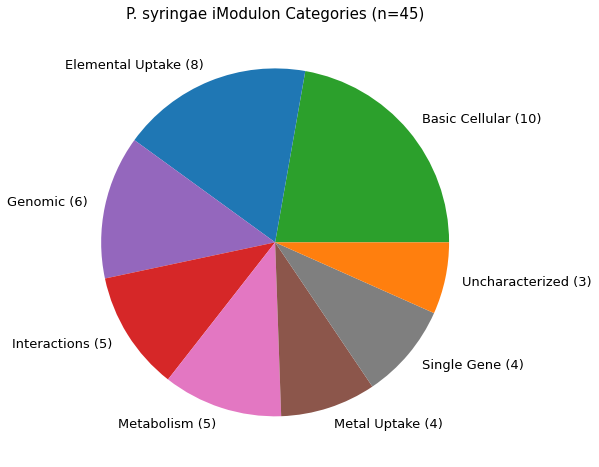

In [28]:
_, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=counts, labels=[f'{cat} ({count})' for cat, count in zip(cats, counts)],
      textprops={'fontsize': 13}, colors=[col_cat_dict[cat] for cat in cats])
ax.set_title(f'P. syringae iModulon Categories (n={sum(counts)})', fontsize=15)

# Explained Variance

In [20]:
cats = []
exp_var_cats = []

for cat, cat_df in ica_data.imodulon_table.groupby('category'):
    exp_var_tot = cat_df['exp_var'].sum()
    cats.append(cat)
    exp_var_cats.append(exp_var_tot)

Text(0.5, 1.0, 'Variance by Category')

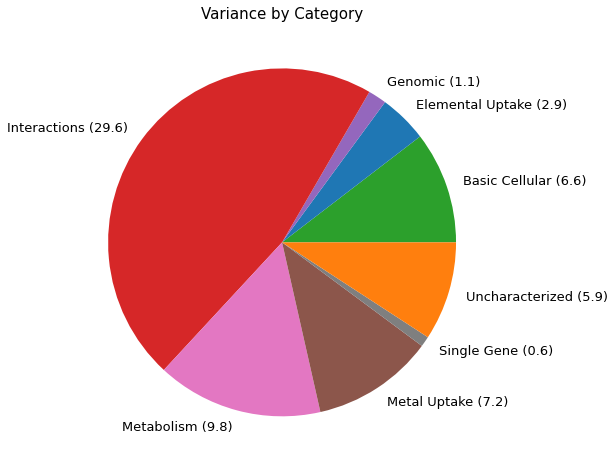

In [29]:
_, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=exp_var_cats, labels=[f'{cat} ({ev:.1f})' for cat, ev in zip(cats, exp_var_cats)],
      textprops={'fontsize': 13}, colors=[col_cat_dict[cat] for cat in cats])
ax.set_title('Variance by Category', fontsize=15)

# Clustering

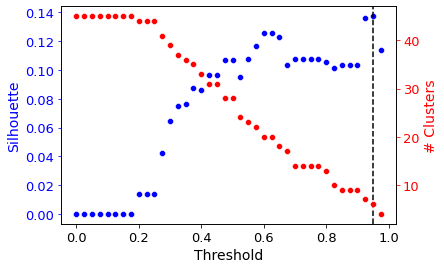

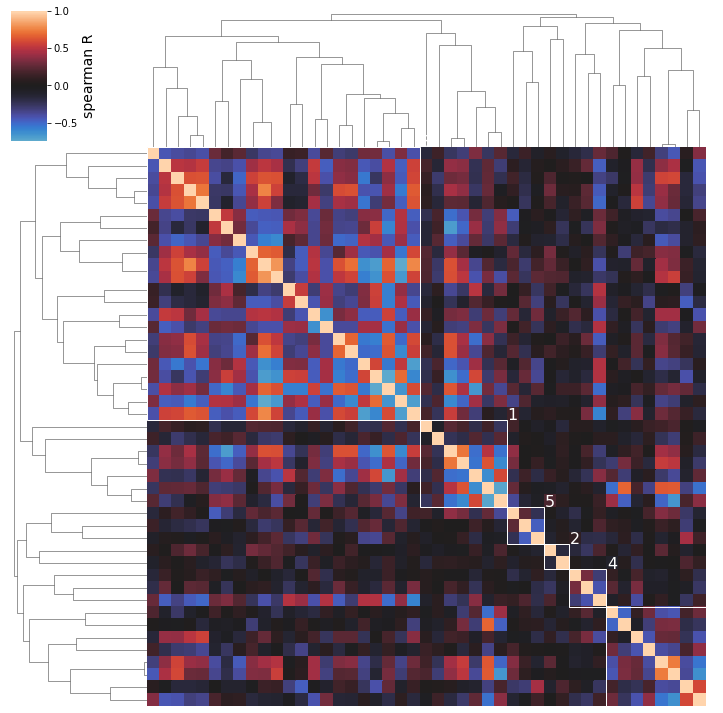

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.9500000000000001,
                         linkage='complete', n_clusters=None)]

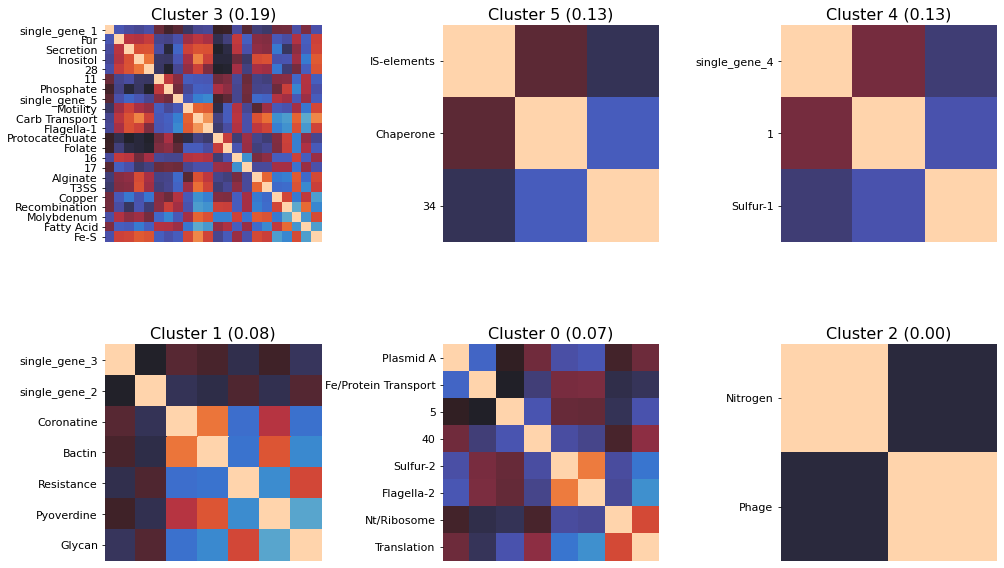

In [34]:
cluster_activities(ica_data, show_thresholding=True, show_best_clusters=True, n_best_clusters=6)

# Immunity Comparisons

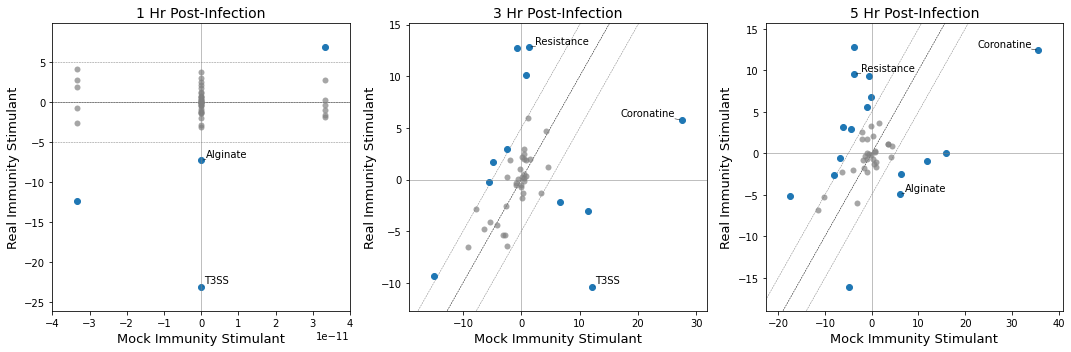

In [75]:
_, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in zip([1, 3, 5], axs):
    plot_dima(ica_data, f'immunity_time:mock_{i}hpi', f'immunity_time:flg22_{i}hpi', ax=ax)
    ax.set_xlabel(f'Mock Immunity Stimulant', fontsize=13)
    ax.set_ylabel(f'Real Immunity Stimulant', fontsize=13)
    ax.set_title(f'{i} Hr Post-Infection', fontsize=14)
    
plt.tight_layout()

<AxesSubplot:xlabel='Gene Start', ylabel='T3SS Gene Weight'>

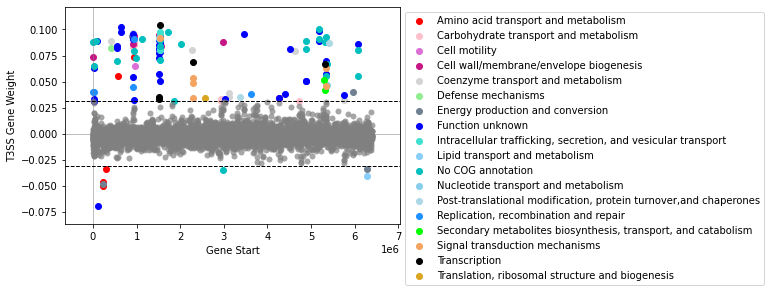

In [94]:
plot_gene_weights(ica_data, 'T3SS',show_labels=False)

# Co-Culture Comparisons

<AxesSubplot:ylabel='Coronatine iModulon\nActivity'>

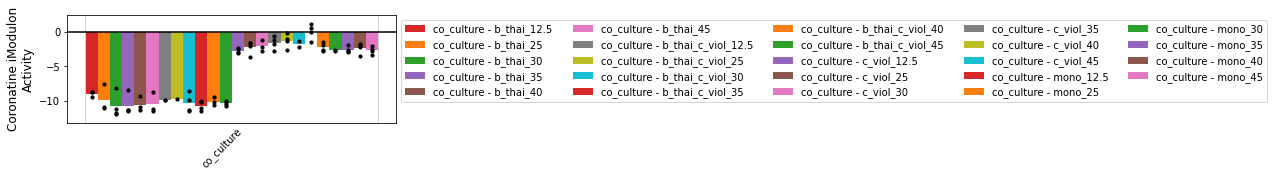

In [120]:
plot_activities(ica_data, 'Coronatine', projects='co_culture')

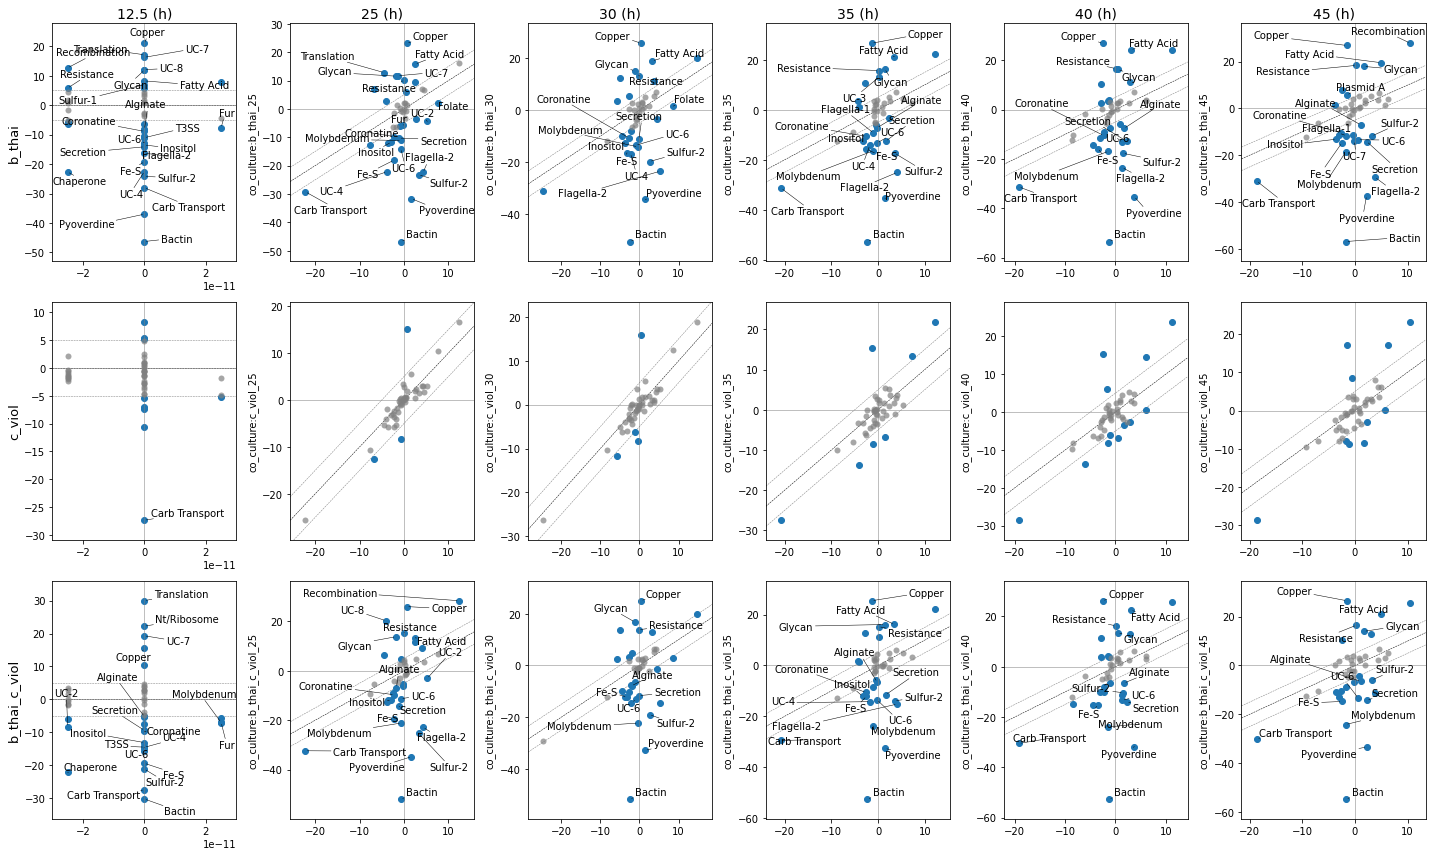

In [129]:
_, axs = plt.subplots(3, 6, figsize=(20, 12))

axs = axs.T

hs = [12.5, 25, 30, 35, 40, 45]
combs = ['b_thai', 'c_viol', 'b_thai_c_viol']

for i, (h, ax_col) in enumerate(zip(hs, axs)):
    for j, (comb, ax) in enumerate(zip(combs, ax_col)):
        plot_dima(ica_data, f'co_culture:mono_{h}', f'co_culture:{comb}_{h}', ax=ax)
        if j == 0:
            ax.set_title(f'{h} (h)', fontsize=14)
        if i == 0:
            ax.set_ylabel(f'{comb}', fontsize=13)
        ax.set_xlabel('')

plt.tight_layout()